In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

file_path = "./dataset/diesel data for dr. kolapo.xlsx"
df = pd.read_excel(file_path)

## Display a preview of the dataset
print("Preview dataset")
print(df.head())

Preview dataset
  Model of vehicle  Tonnage/Capacity  CO(%)  CO2(%)  O2(%)  NOX (ppm) EURO 4
0            TRUCK                30   0.02     2.0  17.64        510   FAIL
1            TRUCK                30   0.00     1.4  18.38        324   FAIL
2            TRUCK                30   0.00     1.4  18.01        408   FAIL
3            TRUCK                30   0.03     2.2  17.46        641   FAIL
4            TRUCK                50   0.05     2.7  17.41         90   PASS


In [3]:
## Display basic information about the dataset
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model of vehicle  25 non-null     object 
 1   Tonnage/Capacity  25 non-null     int64  
 2   CO(%)             25 non-null     float64
 3   CO2(%)            25 non-null     float64
 4   O2(%)             25 non-null     float64
 5   NOX (ppm)         25 non-null     int64  
 6   EURO 4            25 non-null     object 
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ KB
None


In [4]:
## Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
Model of vehicle    0
Tonnage/Capacity    0
CO(%)               0
CO2(%)              0
O2(%)               0
NOX (ppm)           0
EURO 4              0
dtype: int64


In [5]:
## Basic statistics of numerical columns
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       Tonnage/Capacity      CO(%)     CO2(%)      O2(%)   NOX (ppm)
count         25.000000  25.000000  25.000000  25.000000   25.000000
mean          33.800000   0.047200   1.916000  18.218800  304.000000
std           14.014873   0.032726   0.882553   1.199355  155.515005
min           10.000000   0.000000   0.600000  14.180000   86.000000
25%           30.000000   0.020000   1.400000  17.660000  169.000000
50%           30.000000   0.050000   1.800000  18.380000  302.000000
75%           50.000000   0.070000   2.000000  18.670000  418.000000
max           50.000000   0.130000   4.800000  20.950000  641.000000


In [6]:
## Columns names
print("Columns names:")
columnList = df.columns.tolist()
print(df.columns.tolist())

Columns names:
['Model of vehicle', 'Tonnage/Capacity', 'CO(%)', 'CO2(%)', 'O2(%)', 'NOX (ppm)', 'EURO 4']


In [7]:
## Check unique values in label column (Euro 4 or Pass/Fail if present)
if 'EURO 4' in columnList:
    print("\nEuro 4 Value Counts:")
    print(df['EURO 4'].value_counts())


Euro 4 Value Counts:
EURO 4
FAIL    14
PASS    11
Name: count, dtype: int64


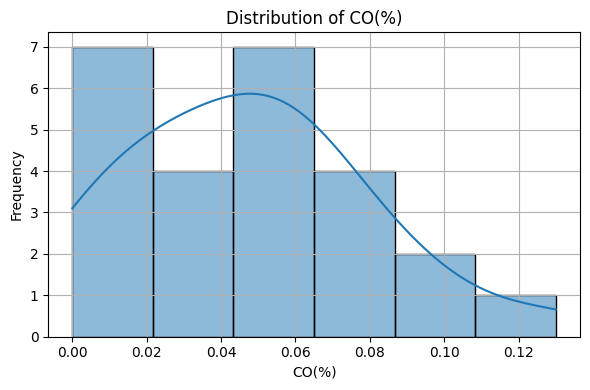

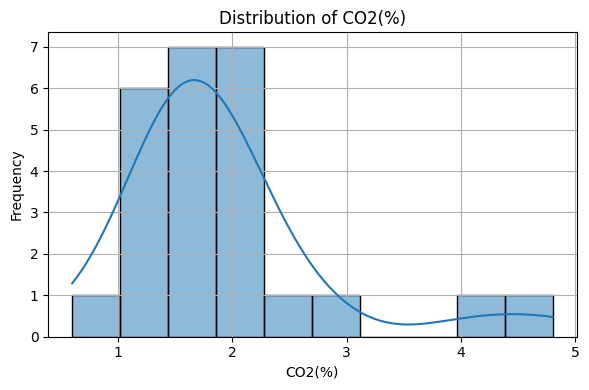

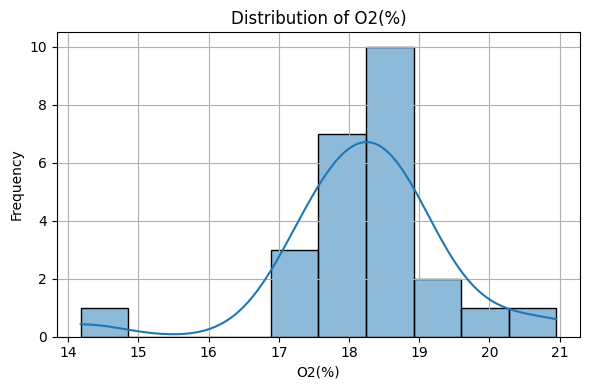

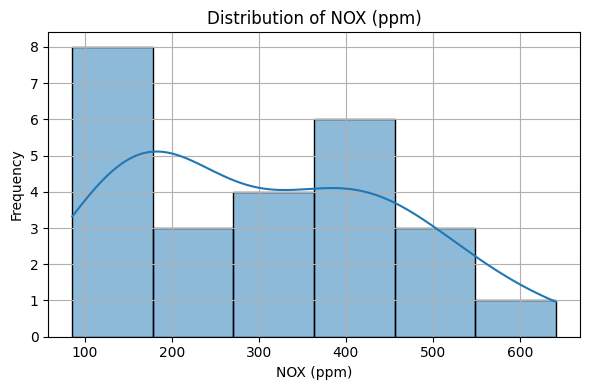

In [8]:
## Visualize emission distributions
emission_columns = ['CO(%)', 'CO2(%)', 'O2(%)', 'NOX (ppm)']
for col in emission_columns:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

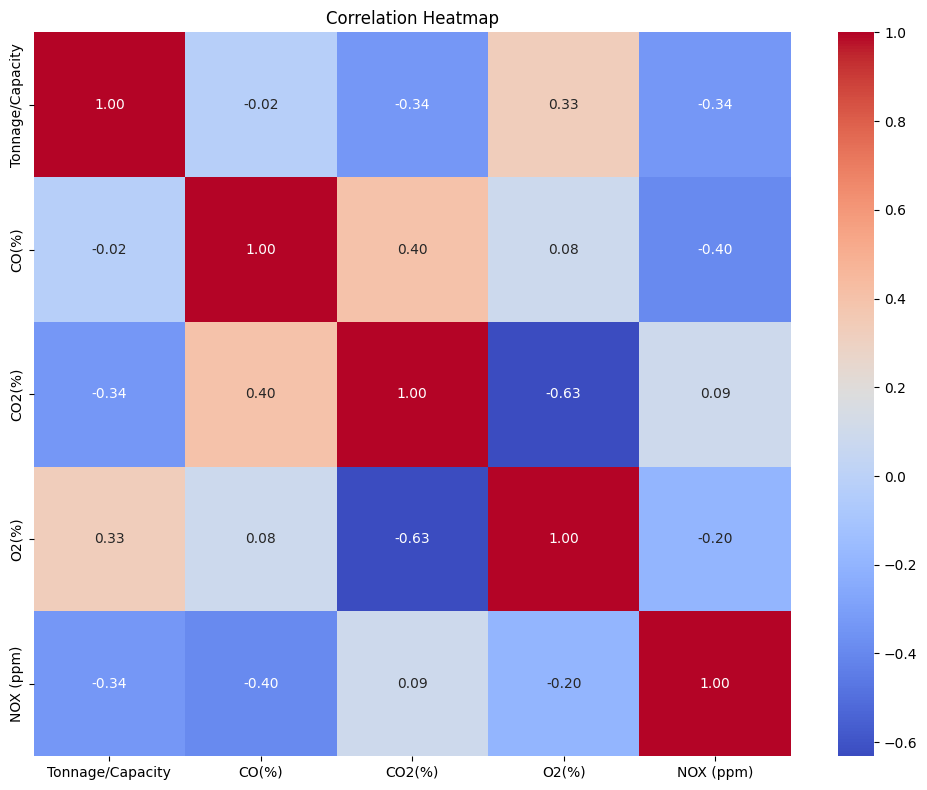

In [9]:
##Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Preprocessing for Multivariate Regression

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Rename columns to remove special characters/spaces for ease of use
df = df.rename(columns={
    'CO(%)': 'CO',
    'CO2(%)': 'CO2',
    'O2(%)': 'O2',
    'NOX (ppm)': 'NOX',
    'Model of vehicle': 'Model',
    'EURO 4': 'EURO4'
})

print(df.head())

   Model  Tonnage/Capacity    CO  CO2     O2  NOX EURO4
0  TRUCK                30  0.02  2.0  17.64  510  FAIL
1  TRUCK                30  0.00  1.4  18.38  324  FAIL
2  TRUCK                30  0.00  1.4  18.01  408  FAIL
3  TRUCK                30  0.03  2.2  17.46  641  FAIL
4  TRUCK                50  0.05  2.7  17.41   90  PASS


In [11]:
# Drop rows with missing emission values
df.dropna(subset=['CO', 'CO2', 'O2', 'NOX', 'Model'], inplace=True)

# Encode the 'Model' feature
le = LabelEncoder()
df['Model_encoded'] = le.fit_transform(df['Model'])

# Define features and targets
X = df[['Model_encoded']] 
y = df[['CO', 'CO2', 'O2', 'NOX']]

# Scale features (optional for tree models, helpful for linear models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training features shape:", X_train.shape)
print("Training targets shape:", y_train.shape)

Training features shape: (20, 1)
Training targets shape: (20, 4)


# Train & Compare Linear Regression vs. Random Forest

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, root_mean_squared_error
import numpy as np

# -------------------------
# Train Linear Regression
# -------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# -------------------------
# Train Random Forest
# -------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# -------------------------
# Evaluation Function
# -------------------------
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(f"  R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"  RMSE: {root_mean_squared_error(y_true, y_pred):.4f}")

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)

# -------------------------
# Cross-validation on full dataset
# -------------------------
print("\nCross-validation on full dataset (X, y):")
for model_name, model in [("Linear Regression", lr_model), ("Random Forest", rf_model)]:
    scores = cross_val_score(model, X, y, scoring='r2', cv=5)
    print(f"{model_name} CV R² Scores: {scores}")
    print(f"{model_name} Mean R²: {scores.mean():.4f}")



Linear Regression Evaluation:
  R² Score: -0.1526
  RMSE: 37.4761

Random Forest Evaluation:
  R² Score: 0.1260
  RMSE: 26.2960

Cross-validation on full dataset (X, y):
Linear Regression CV R² Scores: [-4.44811114 -8.83534601 -0.38570411 -0.62199746 -0.6245022 ]
Linear Regression Mean R²: -2.9831
Random Forest CV R² Scores: [-1.92691976 -4.43806575 -0.80919168 -0.26637868 -0.9729067 ]
Random Forest Mean R²: -1.6827


# Predict New Emissions

In [ ]:
# Example new vehicle 
new_vehicle_model = "TRUCK" ## Change the value to test different data fields

# Encode the model name using the same LabelEncoder as before
new_model_encoded = le.transform([new_vehicle_model])  # Must be from the original trained encoder

# Scale the model input using the same scaler
new_model_scaled = scaler.transform([[new_model_encoded[0]]])

# Predict emissions
new_emissions = rf_model.predict(new_model_scaled)

print("\nPredicted Emissions for", new_vehicle_model)
print(f"  CO: {new_emissions[0][0]:.2f} %")
print(f"  CO2: {new_emissions[0][1]:.2f} %")
print(f"  O2: {new_emissions[0][2]:.2f} %")
print(f"  NOX: {new_emissions[0][3]:.2f} ppm")


Predicted Emissions for TRUCK
  CO: 0.03 %
  CO2: 1.85 %
  O2: 17.77 %
  NOX: 307.38 ppm


c:\Users\user-pc\Desktop\python\Diesel-Regression-Model\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# EURO 4 Compliance Check (Simple Rule-Based)

Using threshhold dervied from the dataset

rule-based logic: 
where X and Y are threshhold dervied from the dataset. 75th percentile of data will be used
If CO < X, NOX < Y, etc. → Pass

Else → Fail

In [19]:
# Set emission thresholds (based on dataset)
co_thresh = df['CO'].quantile(0.75)
co2_thresh = df['CO2'].quantile(0.75)
o2_thresh = df['O2'].quantile(0.75)
nox_thresh = df['NOX'].quantile(0.75)

# Apply rule
def check_euro4_compliance(pred):
    co, co2, o2, nox = pred[0]
    if co < co_thresh and co2 < co2_thresh and o2 < o2_thresh and nox < nox_thresh:
        return "Pass"
    else:
        return "Fail"

compliance = check_euro4_compliance(new_emissions)
print("\nEURO 4 Compliance:", compliance)


EURO 4 Compliance: Pass
